In [299]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# P1-BankStatement file

In [302]:
with open("P1- BankStatements.json", "r") as file:
    bank_statement = json.load(file)

In [305]:
# print('Bank statement:\n',bank_statement)

In [143]:
account_summary = {k:v for k,v in bank_statement['Account'].items() if not isinstance(v,dict)}
account_summary

{'type': 'deposit',
 'maskedAccNumber': 'XXXX6461',
 'version': '1.1',
 'linkedAccRef': '02f28b8d-d8a3-43d7-88c6-5fabb2e51541',
 'xmlns': 'http://api.rebit.org.in/FISchema/deposit',
 'xsi:schemaLocation': 'http://api.rebit.org.in/FISchema/deposit.xsd',
 'xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance'}

In [144]:
account = bank_statement['Account']
profile =  account["Profile"]
profile

{'Holders': {'type': 'SINGLE',
  'Holder': {'name': 'Arun Shakya',
   'dob': '2000-06-09',
   'mobile': '8429489761',
   'nominee': 'REGISTERED',
   'address': '',
   'email': 'NA',
   'pan': 'FORM60',
   'ckycCompliance': 'true'}}}

In [145]:
summary = bank_statement['Account']['Summary']
print("Account Summary:")

for key, value in summary.items():
    print(f"{key}:{value}")


Account Summary:
currentBalance:761.41
currency:INR
exchgeRate:1
balanceDateTime:2024-05-30T03:05:12+05:30
type:SAVINGS
branch:AMETHI JADID, UP
ifscCode:BARB0AMEJAD
micrCode:209012004
openingDate:2020-11-24
currentODLimit:0.00
drawingLimit:0.00
status:ACTIVE
Pending:{'amount': '0.0'}


In [146]:
transactions = bank_statement['Account']['Transactions']['Transaction']


In [147]:
df_transactions.isnull().sum()


type                    0
mode                    0
amount                  0
currentBalance          0
transactionTimestamp    0
valueDate               0
txnId                   0
narration               0
reference               0
dtype: int64

In [133]:
df_transactions = pd.DataFrame(transactions)
df_transactions.head(25)

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.80,2023-06-27T09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
1,DEBIT,CARD,170.0,2010.80,2023-06-28T09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
2,DEBIT,CARD,500.0,1510.80,2023-07-26T10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06T11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA
4,DEBIT,ATM,1000.0,525.80,2023-08-07T17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NA
5,DEBIT,UPI,1.0,524.80,2023-08-22T08:05:06+05:30,2023-08-22,S82724622,UPI/323444770475/080506/UPI/8795417446ybl/Paym,NA
6,CREDIT,UPI,3000.0,3524.80,2023-08-22T11:49:13+05:30,2023-08-22,S90667553,UPI/323441197152/114914/UPI/8795417446ybl/Paym,NA
7,CREDIT,UPI,300.0,3824.80,2023-08-22T12:20:04+05:30,2023-08-22,S92051775,UPI/323457106254/122004/UPI/9264998949barodamp,NA
8,DEBIT,UPI,1200.0,2624.80,2023-08-23T08:17:48+05:30,2023-08-23,S20566812,UPI/323568910825/081748/UPI/8795417446ybl/Paym,NA
9,CREDIT,UPI,400.0,3024.80,2023-08-23T10:51:21+05:30,2023-08-23,S25232032,UPI/323567840697/105122/UPI/kimoroybl/Payment,NA


In [374]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   type                  985 non-null    object
 1   mode                  985 non-null    object
 2   amount                985 non-null    object
 3   currentBalance        985 non-null    object
 4   transactionTimestamp  985 non-null    object
 5   valueDate             985 non-null    object
 6   txnId                 985 non-null    object
 7   narration             985 non-null    object
 8   reference             985 non-null    object
dtypes: object(9)
memory usage: 69.4+ KB


In [149]:
# Convert the transactionTimestamp column to datetime
df_transactions["transactionTimestamp"] = pd.to_datetime(df_transactions["transactionTimestamp"])
df_transactions["valueDate"] = pd.to_datetime(df_transactions["valueDate"])
df_transactions["amount"] = df_transactions["amount"].astype("float")
df_transactions["currentBalance"] = df_transactions["currentBalance"].astype("float")



### - Bank Statement Analysis

### *1) Transaction Analysis*

In [376]:
# total number of transactions made over the year

transactions_by_year = df_transactions.groupby(df_transactions['valueDate'].dt.year)['valueDate'].count()

for year, count in transactions_by_year.items():
    print(f'Total Number of Transactions in {year} : {count}')


Total Number of Transactions in 2023 : 431
Total Number of Transactions in 2024 : 554


In [377]:
# distribution of transaction amounts 

transaction_categories = pd.qcut(df_transactions['amount'], q=3, labels=['Small', 'Medium', 'Large'])
v = transaction_categories.value_counts()
print(f'Distribution of Transaction Amounts: {transaction_categories.value_counts()}')

Distribution of Transaction Amounts: amount
Medium    344
Small     329
Large     312
Name: count, dtype: int64


**Reasoning:**
<br>Quantile method is used for destributing transation amount, where Bottom & Top 33% data will be considered as Small & Large Transactions respectively.

In [378]:
# Analyze the frequency of different transaction types (debit vs. credit)

transaction_type_counts = df_transactions['type'].value_counts()
print(f'Frequency of transaction types: {transaction_type_counts}')

Frequency of transaction types: type
DEBIT     695
CREDIT    290
Name: count, dtype: int64


###  *2) Balance Analysis*

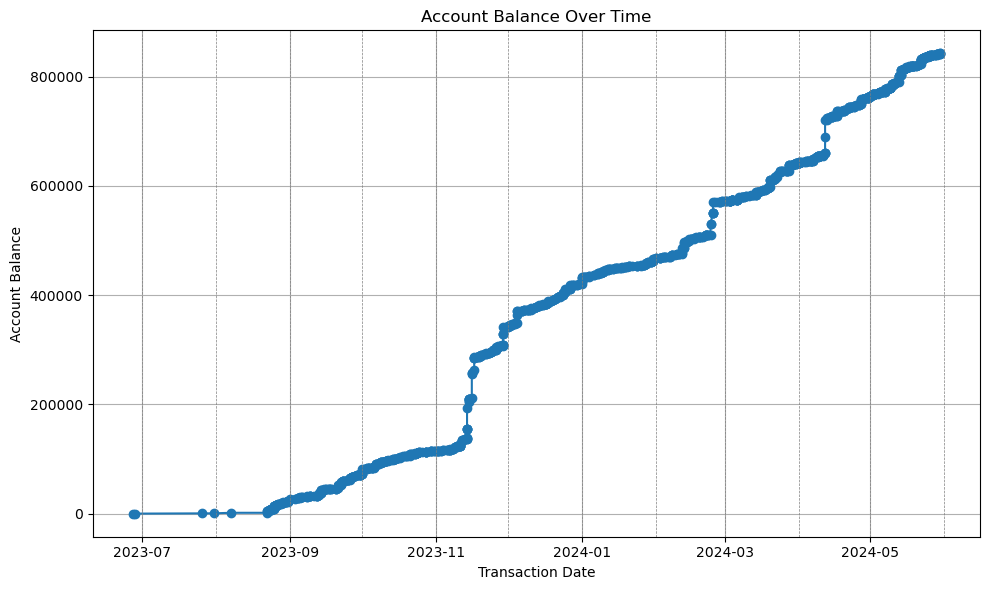

In [157]:
# the trend of the amount balance over time

# Sort by date
df = df_transactions.sort_values(by='valueDate')

# Calculate the cumulative sum
df['currentBalance'] = df['amount'].cumsum()

# Plot the balance over time
plt.figure(figsize=(10, 6))
plt.plot(df['valueDate'], df['currentBalance'], marker='o')
plt.xlabel('Transaction Date')
plt.ylabel('Account Balance')
plt.title('Account Balance Over Time')
plt.grid(True)

months = df_transactions['valueDate'].dt.to_period('M').unique()

# Add vertical grid lines for each month
for month in months:
    plt.axvline(pd.Timestamp(month.end_time), color='gray', linestyle='--', linewidth=0.5)


    
plt.tight_layout()
plt.show()

In [158]:
#Monthly balance Amount over the years

monthly_balance = df_transactions.groupby(df_transactions['valueDate'].dt.to_period('M'))['currentBalance'].sum()

# Convert the index to the desired format "Month Year"
monthly_balance.index = monthly_balance.index.strftime('%B %Y')

print(monthly_balance.sort_values(ascending=False))

valueDate
November 2023     2057059.60
March 2024        1308030.68
December 2023      576258.55
February 2024      399473.24
April 2024         337375.12
May 2024           320980.61
September 2023     261117.20
October 2023       239839.60
January 2024       217363.69
August 2023         88062.60
June 2023            4191.60
July 2023            3036.60
Name: currentBalance, dtype: float64


###  *3) Spending Pattern*

In [159]:
# the main categories of expenses (e.g., fuel, Ecommerce, food, shopping, ATM withdrawals, UPI transactions)

df["Categories"] = df_transactions['narration'].str.extract(r'^([^/-]+)')


expenses_by_categories = df.pivot_table(index=df["Categories"],
                                       values = 'amount',
                                       aggfunc = {'amount':['sum','count']})


In [160]:
categories_of_expenses = expenses_by_categories.sort_values(by=('sum'), ascending=False)

print(f'The main Categories of Expenses: \n\n{categories_of_expenses}')

The main Categories of Expenses: 

                       count        sum
Categories                             
UPI                      789  587092.90
NEFT                     159  172430.51
BY CASH                    1   45000.00
IMPS                      25   23672.00
ATM                        3   13500.00
PRCR                       4     830.00
51888100006461IntPd01      4     135.00


###  *4) Income Analysis: *

In [161]:
# the main categories of expenses

credits = df_transactions[df_transactions['type'] == "CREDIT"]
mode_totals = credits.groupby('mode')['amount'].sum().sort_values(ascending=False)
mode_totals_df = mode_totals.reset_index(name='Total Amount')
print(f"The main Catagories of expenses : \n\n{mode_totals_df}")

The main Catagories of expenses : 

     mode  Total Amount
0  OTHERS     196237.51
1     UPI     179333.00
2    CASH      45000.00


In [162]:
# Is there SALARY prsent in Others Mode of transaction? NO

credits_others = df_transactions[(df_transactions['type'] == "CREDIT") & (df_transactions['mode'] == "OTHERS")]

top_repeated_amounts = credits_others['amount'].value_counts().head(5)

print(f"The most repeated amount for mode 'OTHERS': \n{top_repeated_amounts}")

The most repeated amount for mode 'OTHERS': 
amount
600.0    10
250.0     7
800.0     7
400.0     6
350.0     5
Name: count, dtype: int64


**Reason:**
<br>The Analysis shows the UPI credts is the main sourse of Income.

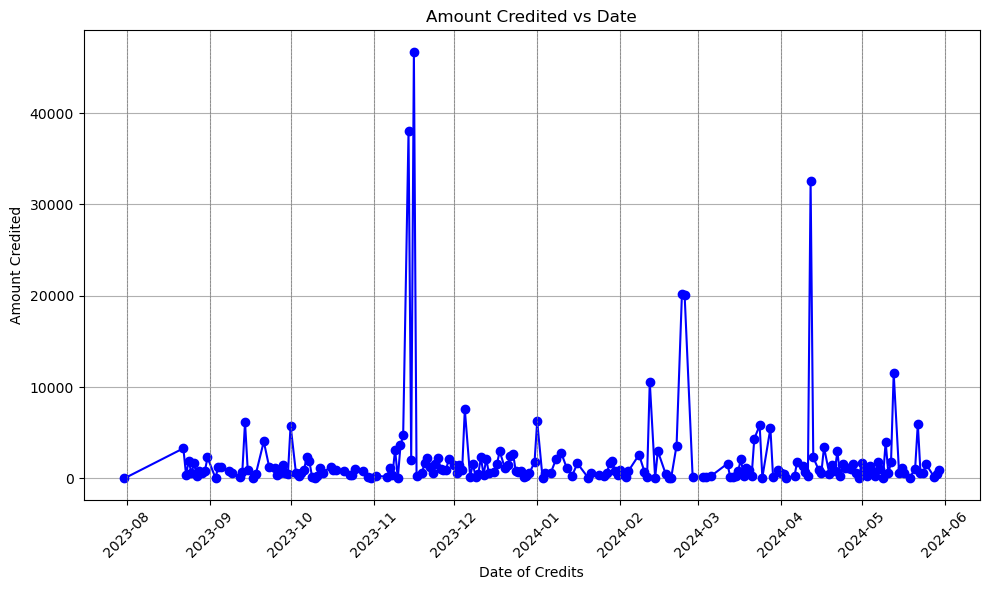

In [163]:
# patterns in the timing and amount of income received

amount_credited_vs_date = credits.groupby('valueDate')['amount'].sum()

# Plotting a time-series graph
plt.figure(figsize=(10, 6))
plt.plot(amount_credited_vs_date.index, amount_credited_vs_date.values, marker='o', linestyle='-', color='b')
plt.title('Amount Credited vs Date')
plt.xlabel('Date of Credits')
plt.ylabel('Amount Credited')
plt.grid(True)

months = amount_credited_vs_date.index.to_period('M').unique()

# Add vertical grid lines for each month
for month in months:
    plt.axvline(pd.Timestamp(month.end_time), color='gray', linestyle='--', linewidth=0.5)
    
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

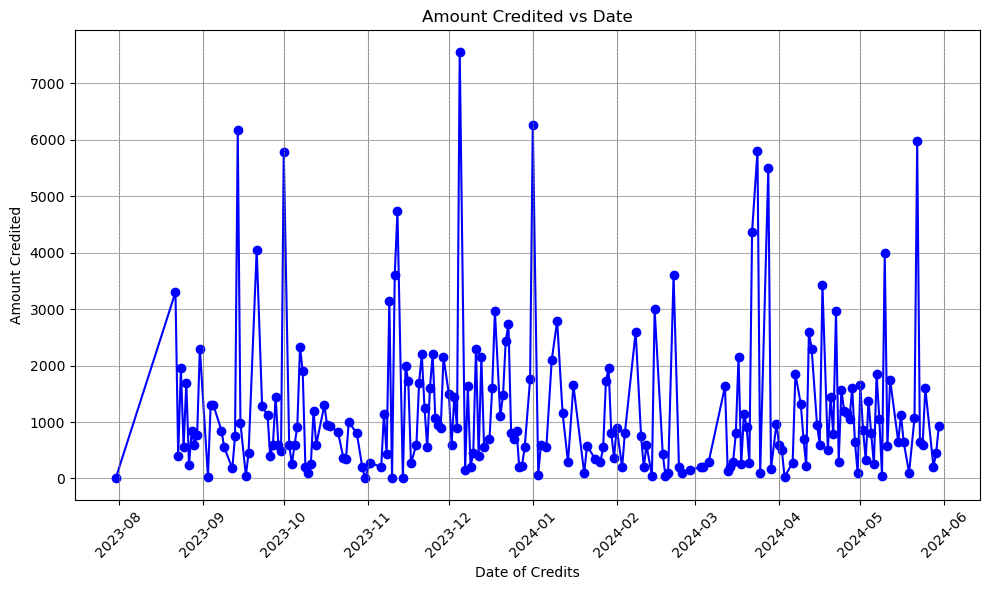

In [164]:
# DROP Outliers to Vizualize the pattern the data clearly

# patterns in the timing and amount of income received
credit_sorted = credits.sort_values(by='amount', ascending=False).iloc[7:]
amount_credited = credit_sorted.groupby('valueDate')['amount'].sum()

# Plotting a time-series graph
plt.figure(figsize=(10, 6))
plt.plot(amount_credited.index, amount_credited.values, marker='o', linestyle='-', color='b')
plt.title('Amount Credited vs Date')
plt.xlabel('Date of Credits')
plt.ylabel('Amount Credited')
plt.grid(True)

month = amount_credited.index.to_period('M').unique()

# Add vertical grid lines for each month
for month in month:
    plt.axvline(pd.Timestamp(month.end_time), color='gray', linestyle='--', linewidth=0.5)
    
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Reason:**
<br>The Analysis shows there is not a clear pattern in the timing and amount of income received.

In [166]:
credit_sorted['currentBalance'].mean()

6295.877279151943

###  *5) Alert Generation: *

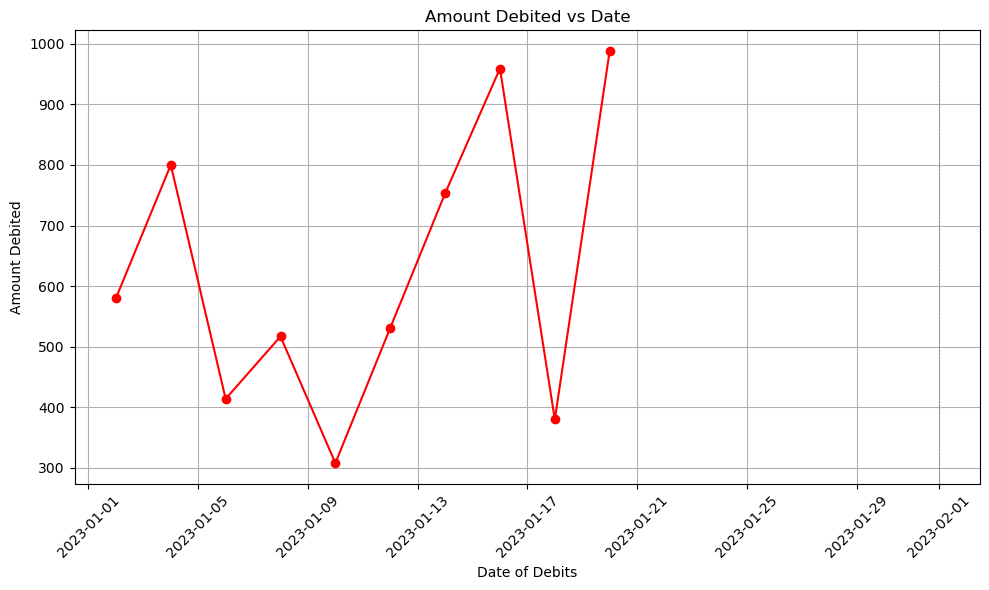

In [357]:
# unusual or suspicious transactions.

# Filter the DataFrame for debit transactions
debits = df_transactions[df_transactions['type'] == "DEBIT"]
amount_debited_vs_date = debits.groupby('valueDate')['amount'].sum()

# Plotting a time-series graph for debits
plt.figure(figsize=(10, 6))
plt.plot(amount_debited_vs_date.index, amount_debited_vs_date.values, marker='o', linestyle='-', color='r')
plt.title('Amount Debited vs Date')
plt.xlabel('Date of Debits')
plt.ylabel('Amount Debited')
plt.grid(True)

# Add vertical grid lines for each month
for month in months:
    plt.axvline(pd.Timestamp(month.end_time), color='gray', linestyle='--', linewidth=0.5)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


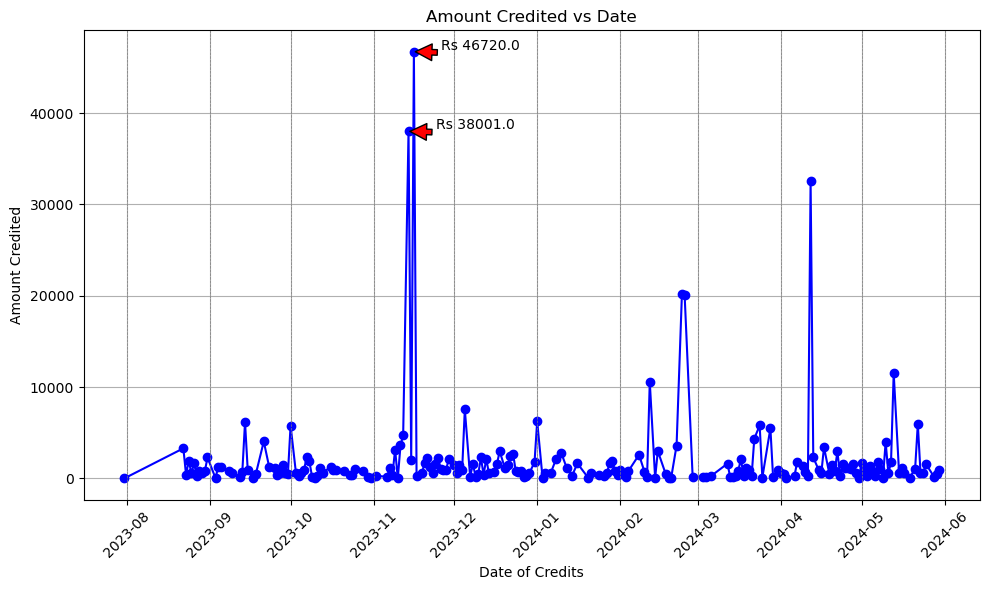

In [405]:
# patterns in the timing and amount of income received

amount_credited_vs_date = credits.groupby('valueDate')['amount'].sum()

# Plotting a time-series graph
plt.figure(figsize=(10, 6))
plt.plot(amount_credited_vs_date.index, amount_credited_vs_date.values, marker='o', linestyle='-', color='b')
plt.title('Amount Credited vs Date')
plt.xlabel('Date of Credits')
plt.ylabel('Amount Credited')
plt.grid(True)

months = amount_credited_vs_date.index.to_period('M').unique()

# Add vertical grid lines for each month
for month in months:
    plt.axvline(pd.Timestamp(month.end_time), color='gray', linestyle='--', linewidth=0.5)
    
# Annotate top 2 transactions
top_2_transactions = amount_credited_vs_date.nlargest(2)
for date, amount in top_2_transactions.items():
    plt.annotate(f'Rs {amount}', xy=(date, amount), xytext=(date + pd.Timedelta(days=25) , amount - 100),
                 arrowprops=dict(facecolor='red', shrink=0.05),
                 horizontalalignment='center', verticalalignment='bottom')

    
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Reason:**
<br>The Analysis shows that the two unusual High Amount transactions credited in the Account with amount more than Rs 35000, where the average credited amount is Rs 870.

In [182]:
# low balance alerts

def detect_low_balance(df_transactions, window=30):
   
    df_transactions['valueDate'] = pd.to_datetime(df_transactions['valueDate'])
    df_transactions['rolling_avg_balance'] = df_transactions['currentBalance'].rolling(window=window, min_periods=1).mean()

    # Calculate quantiles
    quantiles = df_transactions['rolling_avg_balance'].quantile([0.1, 0.9])

    # Flag low balance periods
    df_transactions['low_balance_alert'] = (
        df_transactions['currentBalance'] < quantiles[0.1]
    )

    return df_transactions[['valueDate', 'currentBalance', 'low_balance_alert']]

# Detect low balance periods
low_balance_periods = detect_low_balance(df_transactions, window=30)

# Filter and display low balance periods
low_balance_data = low_balance_periods[low_balance_periods['low_balance_alert']]
print("Low Balance Periods:")
print(low_balance_data.sort_values(by='currentBalance', ascending=False))


Low Balance Periods:
     valueDate  currentBalance  low_balance_alert
769 2024-04-20         1426.21               True
830 2024-05-04         1423.21               True
797 2024-04-28         1418.21               True
38  2023-08-28         1405.80               True
39  2023-08-28         1395.80               True
..         ...             ...                ...
73  2023-09-13           29.80               True
980 2024-05-29           23.41               True
864 2024-05-09           19.21               True
749 2024-04-14            1.21               True
51  2023-09-01            0.80               True

[287 rows x 3 columns]


In [180]:
# High expenditure alerts

def detect_high_expenditure(df_transactions):

    # Filter debit transactions
    debit_transactions = df_transactions[df_transactions['type'] == 'DEBIT']
    # Calculate quantiles
    quantiles = df_transactions['amount'].quantile([0.1, 0.9])

    # Flag high expenditure periods
    df_transactions['high_expenditure_alert'] = (
        df_transactions['amount'] > quantiles[0.9]
    )

    return df_transactions[['valueDate', 'amount', 'high_expenditure_alert']]

# Detect high expenditure periods
high_expenditure_periods = detect_high_expenditure(df_transactions)

# Filter and display high expenditure periods
high_expenditure_data = high_expenditure_periods[high_expenditure_periods['high_expenditure_alert']]
print("High Expenditure Periods:")
print(high_expenditure_data.sort_values(by='amount', ascending=False))


High Expenditure Periods:
     valueDate   amount  high_expenditure_alert
291 2023-11-16  45000.0                    True
275 2023-11-14  37999.0                    True
743 2024-04-12  30000.0                    True
744 2024-04-12  30000.0                    True
295 2023-11-17  21000.0                    True
..         ...      ...                     ...
303 2023-11-20   1700.0                    True
266 2023-11-12   1660.0                    True
813 2024-05-01   1650.0                    True
621 2024-03-12   1630.0                    True
359 2023-12-08   1630.0                    True

[99 rows x 3 columns]


# P2- OfficeSupplies data

In [205]:
office_supplies = pd.read_csv('P2- OfficeSupplies data.csv')
office_supplies.head(10)

,OrderDate,Region,Rep,Item,Units,Unit Price
0,04-Jul-14,East,Richard,Pen Set,62,4.99
1,12-Jul-14,East,Nick,Binder,29,1.99
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49
3,29-Jul-14,East,Susan,Binder,81,19.99
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95
5,15-Aug-14,East,Richard,Pencil,35,4.99
6,24-Aug-14,West,James,Desk,3,275.00
7,01-Sep-14,Central,Smith,Desk,2,125.00
8,10-Sep-14,Central,Bill,Pencil,7,1.29
9,18-Sep-14,East,Richard,Pen Set,16,15.99


In [206]:
office_supplies['OrderDate'] = pd.to_datetime(office_supplies['OrderDate'], format='%d-%b-%y', errors='coerce')


In [207]:
office_supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderDate   43 non-null     datetime64[ns]
 1   Region      43 non-null     object        
 2   Rep         43 non-null     object        
 3   Item        43 non-null     object        
 4   Units       43 non-null     int64         
 5   Unit Price  43 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.1+ KB


In [208]:
office_supplies.isnull().sum()

OrderDate     0
Region        0
Rep           0
Item          0
Units         0
Unit Price    0
dtype: int64

### *1) Sales Analysis*

In [209]:
office_supplies['Total_price'] = office_supplies['Units'] * office_supplies['Unit Price']

total_sales = office_supplies.groupby('Item').agg(
    total_sales=('Total_price', 'sum'),
    transaction_count=('Total_price', 'count')
).reset_index()

In [195]:
# the total sales for each product category

total_product_sales = office_supplies.groupby('Item').agg(
                                          Total_sales= ('Total_price', 'count'),
                                          Total_Price= ('Total_price', 'sum')
                                         ).reset_index().sort_values(by = 'Total_sales', ascending =False)

In [196]:
print(f'Total Product Sales: \n\n{total_product_sales}')

Total Product Sales: 

      Item  Total_sales  Total_Price
0   Binder           15      9577.65
4   Pencil           13      2135.14
3  Pen Set            7      4169.87
2      Pen            5      2045.22
1     Desk            3      1700.00


In [197]:
# product category has the highest sales

print(f"{total_product_sales['Item'].iloc[0]} product catagory has a highest Sales of Rs{total_product_sales['Total_Price'].iloc[0]}.")

Binder product catagory has a highest Sales of Rs9577.65.


### *2) Customer Analysis*

In [198]:
# the top 10 best-selling products

top_selling_products = office_supplies.groupby('Item')['Item'].count().sort_values(ascending=False)
print(f'Top best-selling products:\n\n {top_selling_products}')

Top best-selling products:

 Item
Binder     15
Pencil     13
Pen Set     7
Pen         5
Desk        3
Name: Item, dtype: int64


In [199]:
#Top 10 Customers by sales

office_supplies.groupby(office_supplies['Rep'])['Units'].sum().sort_values(ascending=False).head(10)

Rep
Richard    396
Alex       281
Bill       213
Matthew    193
Rachel     183
Morgan     173
Susan      170
Smith      156
James      142
Nick       125
Name: Units, dtype: int64

In [200]:
# the total number of unique customers
unique_customers = office_supplies['Rep'].unique()
print(f'Unique Customers:\n\n{unique_customers}')

Unique Customers:

['Richard' 'Nick' 'Morgan' 'Susan' 'Matthew' 'James' 'Smith' 'Bill'
 'Thomas' 'Rachel' 'Alex']


In [201]:
# customer purchase frequency

customer_freuency = office_supplies.groupby('Rep')['Rep'].count().reset_index(name='Frequency')
customer_freuency = customer_freuency.rename(columns={'Rep': 'Customer'})
print(f'Customer Frequency:\n\n {customer_freuency}')

Customer Frequency:

    Customer  Frequency
0      Alex          5
1      Bill          5
2     James          4
3   Matthew          4
4    Morgan          3
5      Nick          2
6    Rachel          4
7   Richard          8
8     Smith          3
9     Susan          3
10   Thomas          2


### *3) Time Series Analysis*

In [213]:
# Create OrderMonthYear as a Period object for correct sorting
office_supplies['OrderMonthYear'] = office_supplies['OrderDate'].dt.to_period('M')

# Group by OrderMonthYear and sum Total_price
monthly_total_sales = office_supplies.groupby('OrderMonthYear')['Total_price'].sum()

# Format the index to display properly
monthly_total_sales.index = monthly_total_sales.index.strftime('%y %B')

print(monthly_total_sales)

OrderMonthYear
14 July         2673.23
14 August       2005.55
14 September     666.11
14 October      1984.57
14 November      833.78
14 December     3288.47
15 January      1602.09
15 February     2044.33
15 March         556.87
15 April        1059.03
15 May          1300.35
15 June         1613.50
Name: Total_price, dtype: float64


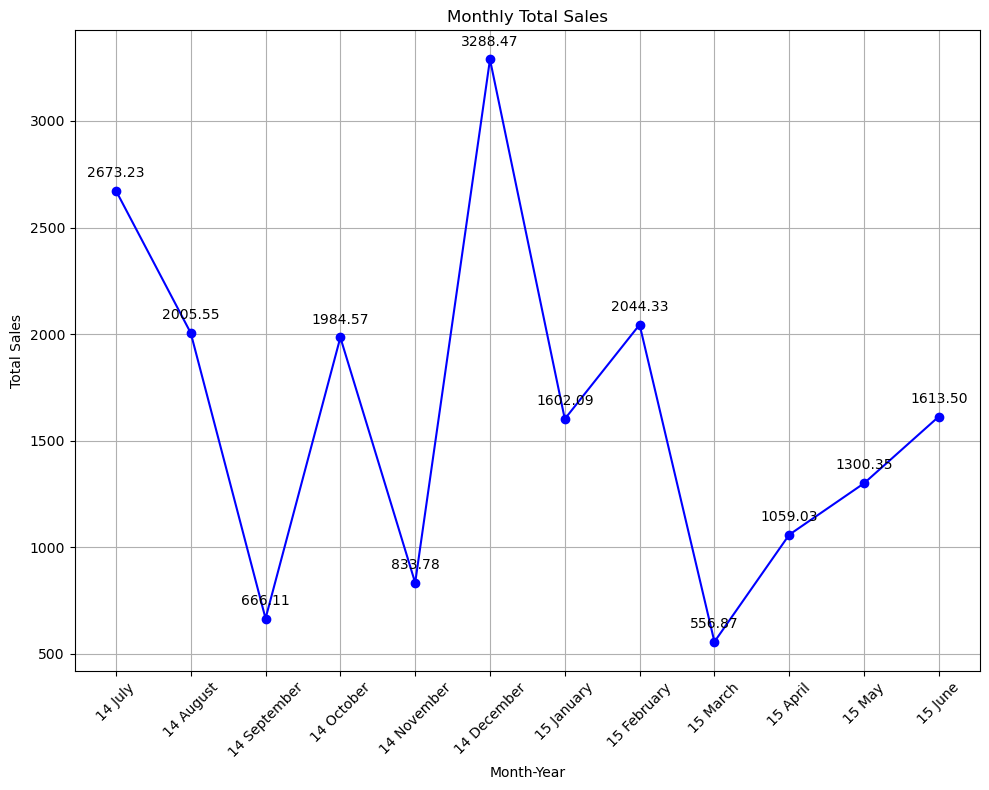

In [214]:
plt.figure(figsize=(10, 8))
plt.plot(monthly_total_sales.index, monthly_total_sales.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Total Sales')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)

# Annotate sales values at each node with two digits after the decimal point
for i, value in enumerate(monthly_total_sales.values):
    plt.annotate(f'{value:.2f}', (monthly_total_sales.index[i], value), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()


### *4) Geographical Analysis*

In [507]:
# regions generate the most sales

region_most_sales = office_supplies.groupby(office_supplies['Region'])['Total_price'].sum().sort_values(ascending=False)

In [514]:
print(f'{region_most_sales.index[0]} region has most sales of {region_most_sales.values[0]}.')

Central region has most sales of 11139.07.


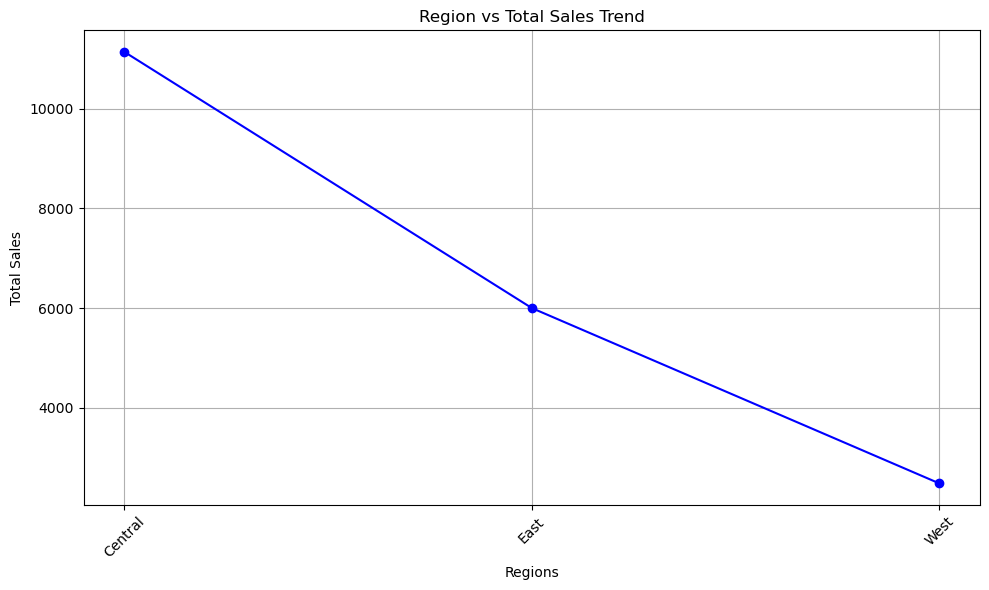

In [517]:
# the sales trends across different regions

plt.figure(figsize=(10, 6))
plt.plot(region_most_sales.index, region_most_sales.values, marker='o', linestyle='-', color='b')
plt.title('Region vs Total Sales Trend')
plt.xlabel('Regions')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### *5) Profit Analysis*

In [518]:
# What is the total profit for each product category?

**Reasing:**
<br>To calculate profit both Selling and Cost price is needed. But one of the price is missing in the data.

# P3- Churn-Modelling Data

In [100]:
churn_data = pd.read_excel('P3- Churn-Modelling Data.xlsx')
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [101]:
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churned            0
dtype: int64

In [102]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  churned          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [103]:
churn_data = churn_data.drop(columns="RowNumber")

### *1) Customer Demographics*

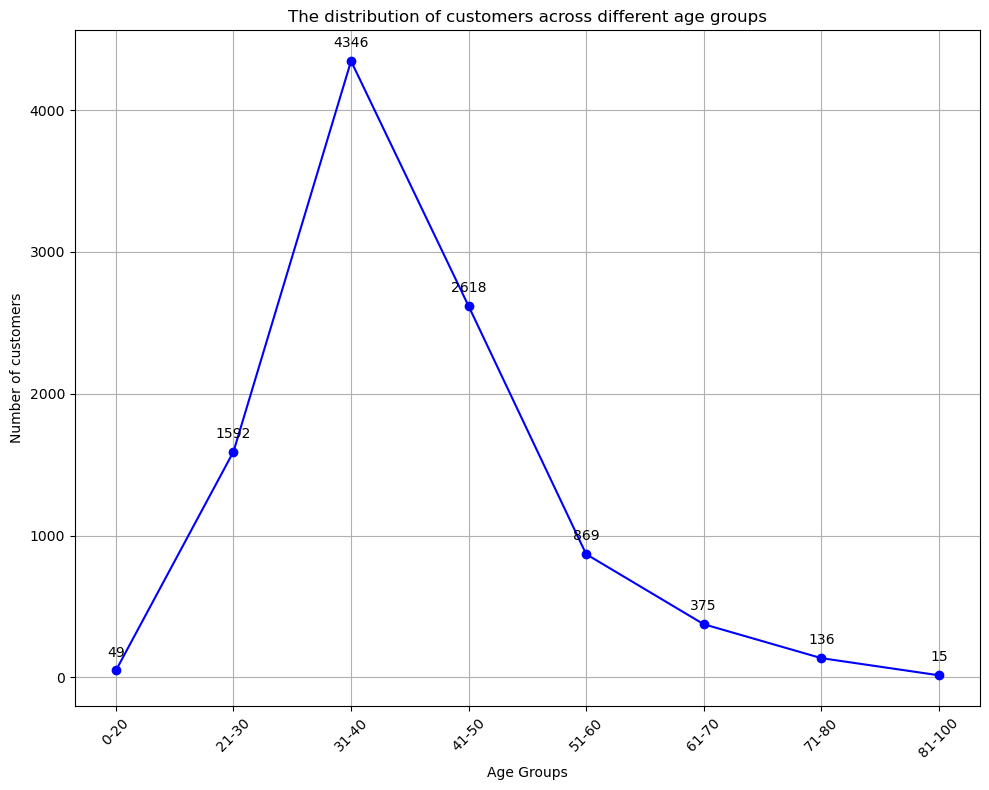

In [104]:
# the distribution of customers across different age groups

bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100']

age_group_distribution = pd.cut(churn_data['Age'], bins=bins, labels=labels, right=False).value_counts().sort_index()


plt.figure(figsize=(10, 8))
plt.plot(age_group_distribution.index, age_group_distribution.values, marker='o', linestyle='-', color='b')
plt.title('The distribution of customers across different age groups')
plt.xlabel('Age Groups')
plt.ylabel('Number of customers')
plt.grid(True)
plt.xticks(rotation=45)

# Annotate numbers at each node
for i, value in enumerate(age_group_distribution.values):
    plt.annotate(f'{value}', (i, value), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

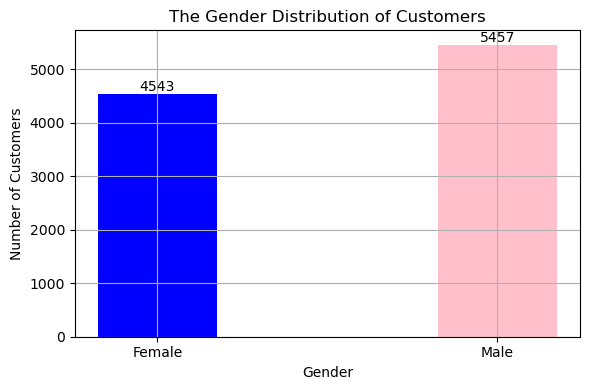

In [105]:
# the gender distribution of customers

gender_customer_distribution = churn_data.groupby(churn_data['Gender'])['Gender'].count()

plt.figure(figsize=(6, 4))
bars = plt.bar(gender_customer_distribution.index, gender_customer_distribution.values, color=['blue', 'pink'], width=0.35)
plt.title('The Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.grid(True)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')
    
plt.tight_layout()    
plt.show()

### *2) Churn Analysis*

In [106]:
# percentage of customers have churned

churned_customers = len(churn_data[churn_data['churned'] == 1])
total_customers = len(churn_data)

churned_percentage = (churned_customers / total_customers) * 100
print(f'Percentage of customers have churned: {churned_percentage}')

Percentage of customers have churned: 20.369999999999997


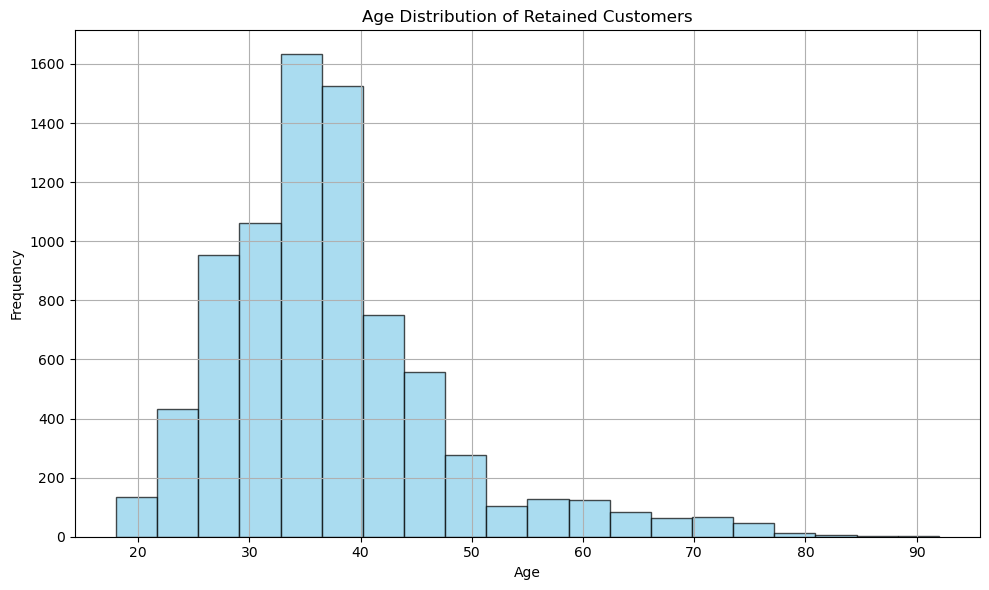

In [237]:
# trends among customers who have churned

churned_customers = churn_data[churn_data['churned'] == 0]

# Analyze age distribution
plt.figure(figsize=(10, 6))
plt.hist(churned_customers['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Retained Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [286]:
### The main reasons for customer churn

churned_customers = churn_data[churn_data['churned']==1]
retained_customers = churn_data[churn_data['churned']==0]

Total_retained_customers = retained_customers.shape[0]
Total_churned_customers = churned_customers.shape[0]
print(f'Total_retained_customers: {Total_retained_customers}\nTotal_churned_customers:  {Total_churned_customers}')

Total_retained_customers: 7963
Total_churned_customers:  2037


/var/folders/_k/hb8y9wrj6d723x48prtt8lb80000gn/T/ipykernel_1001/3603365377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_customers['Geography'] = churned_customers['Geography'].map(geography_mapping)


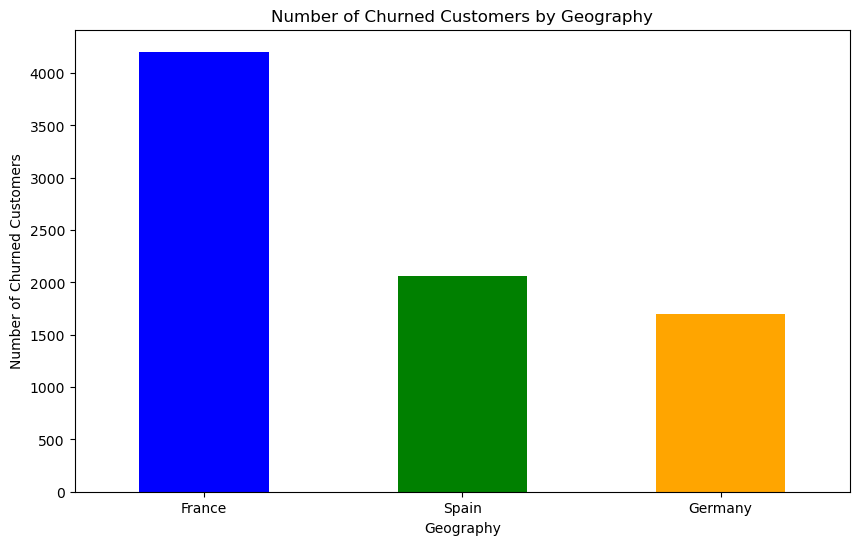

In [255]:

geography_mapping = {0: 'France', 1: 'Germany', 2: 'Spain'}
churned_customers['Geography'] = churned_customers['Geography'].map(geography_mapping)

# Count churned customers by geography
geography_counts = churned_customers['Geography'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
geography_counts.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('Number of Churned Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=0)
plt.show()

In [291]:
# effect of Balance on churn customer

AvgBalance_retained_customers = retained_customers['Balance'].mean()
AvgBalance_churned_customers = churned_customers['Balance'].mean()

print(f'Average Balance of retained Customers: {AvgBalance_retained_customers:.2f}')
print(f'Average Balance of Churned Customers: {AvgBalance_churned_customers:.2f}')


Average Balance of retained Customers: 72745.30
Average Balance of Churned Customers: 91108.54


### *4) Product Usage*

In [296]:
# Assuming churn_data is your DataFrame
total_customers = len(churn_data)

# Count of customers with credit card
has_credit_card = churn_data['HasCrCard'].sum()

# Count of customers without credit card
no_credit_card = total_customers - has_credit_card

print(f"Total customers with credit card: {has_credit_card}")
print(f"Total customers without credit card: {no_credit_card}")



Total customers with credit card: 7055
Total customers without credit card: 2945


In [297]:
# Assuming churn_data is your DataFrame
active_members = churn_data[churn_data['IsActiveMember'] == 1]['IsActiveMember'].count()
inactive_members = churn_data[churn_data['IsActiveMember'] == 0]['IsActiveMember'].count()

print(f"Number of active members: {active_members}")
print(f"Number of inactive members: {inactive_members}")


Number of active members: 5151
Number of inactive members: 4849


### *4) Financial Analysis*

In [109]:
# the average account balance of customers

avg_balance = churn_data['Balance'].mean()
print(f'The average account balance of customers: {avg_balance}')

The average account balance of customers: 76485.889288


In [110]:
# the financial characteristics of churned vs. non-churned customers

grouped_data = churn_data.groupby(churn_data['churned'])[['Balance', 'EstimatedSalary', 'CreditScore']].mean()
grouped_data.index = ['Non-Churned', 'Churned']

grouped_data

,Balance,EstimatedSalary,CreditScore
Non-Churned,72745.296779,99738.391772,651.853196
Churned,91108.539337,101465.677531,645.351497


### *5) Predictive Modeling*

In [111]:
churn_data.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [112]:
#churn_data['Gender'] = churn_data['Gender'].map({"Male":1, "Female":0})

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [114]:
# Encode categorical variables
label_encoders = {}
for column in ['Geography', 'Gender']:
    le = LabelEncoder()
    churn_data[column] = le.fit_transform(churn_data[column])
    label_encoders[column] = le

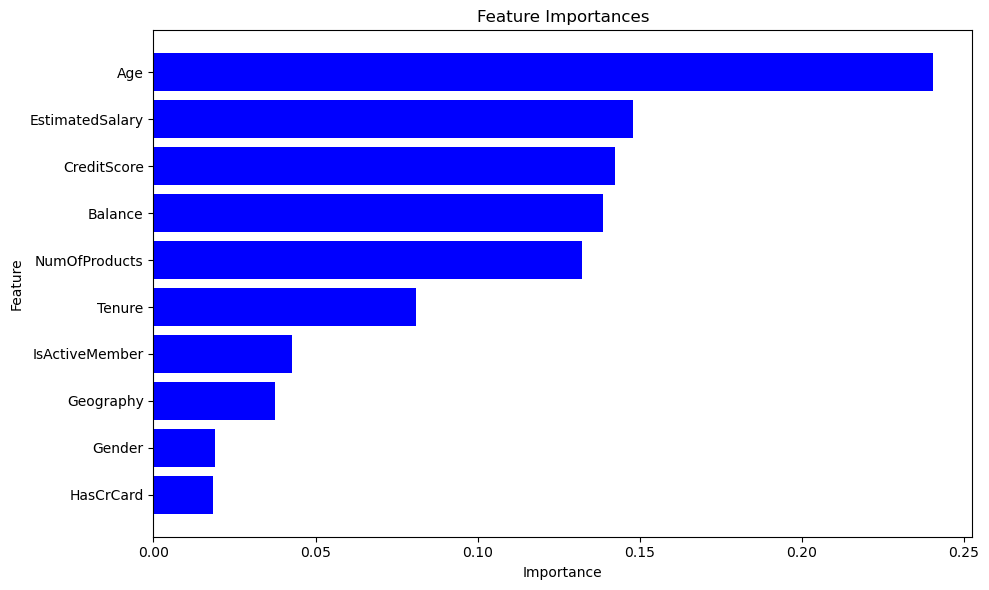

           Feature  Importance
0              Age    0.240453
1  EstimatedSalary    0.148004
2      CreditScore    0.142369
3          Balance    0.138670
4    NumOfProducts    0.132061
5           Tenure    0.080932
6   IsActiveMember    0.042807
7        Geography    0.037402
8           Gender    0.019032
9        HasCrCard    0.018269


In [115]:
X = churn_data.drop(columns=['CustomerId', 'Surname', 'churned'])
y = churn_data['churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='b')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Display the importance dataframe
print(importance_df)

In [659]:
corr_data = churn_data.drop(columns=['CustomerId', 'Surname'])

<Axes: >

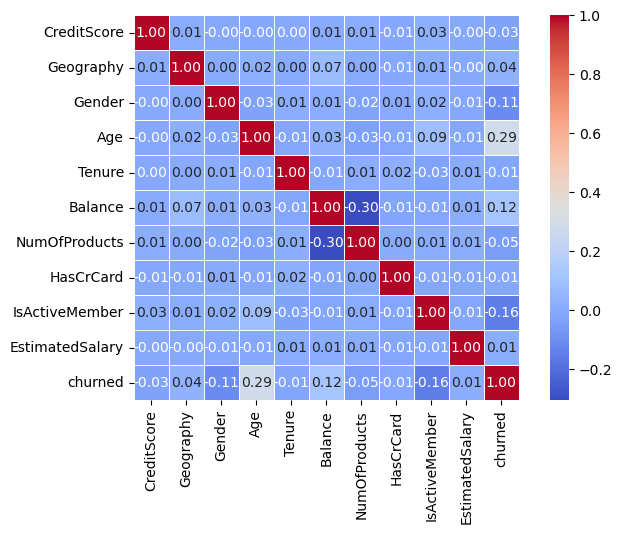

In [664]:
corr = corr_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)


Applying SMOTE Sampling method to tackle imbalance dataset

Training RandomForest...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters for RandomForest: {'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Classification Report for RandomForest:

                   precision    recall  f1-score   support

Retained Customer       0.91      0.86      0.89      1607
 Churned Customer       0.54      0.67      0.60       393

         accuracy                           0.82      2000
        macro avg       0.73      0.77      0.74      2000
     weighted avg       0.84      0.82      0.83      2000





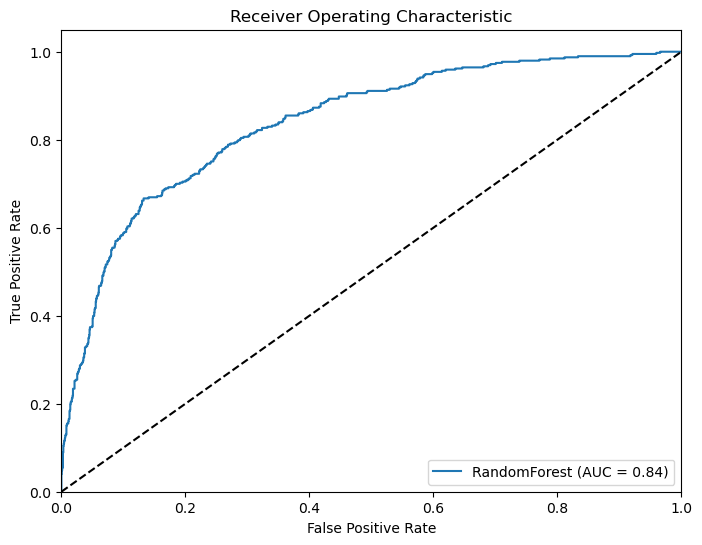

Training LogisticRegression...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Users/omkarvilasnarkar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/omkarvilasnarkar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/omkarvilasnarkar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/omkarvilasnarkar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/omkarvilasnarkar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/omk

Best Hyperparameters for LogisticRegression: {'model__C': 1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Classification Report for LogisticRegression:

                   precision    recall  f1-score   support

Retained Customer       0.88      0.77      0.82      1607
 Churned Customer       0.38      0.59      0.46       393

         accuracy                           0.73      2000
        macro avg       0.63      0.68      0.64      2000
     weighted avg       0.78      0.73      0.75      2000





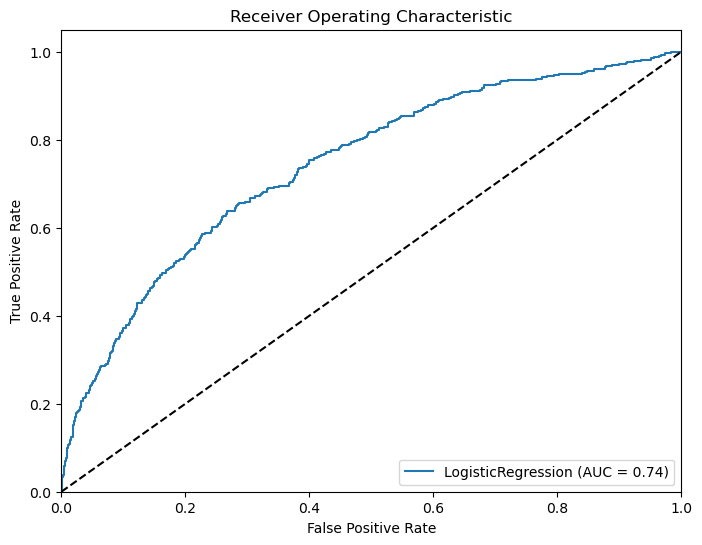

[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   0.8s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   3.3s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100; total time=   1.6s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time=   3.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100; total time=   1.4s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200; total time=   2.9s
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100; total time=   1.5s
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_spli

[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   0.8s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   1.7s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50; total time=   0.8s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50; total time=   0.8s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50; total time=   0.8s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100; total time=   1.5s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50; total time=   0.7s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=10,

[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   1.7s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   3.2s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100; total time=   1.5s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time=   3.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200; total time=   2.9s
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100; total time=   1.5s
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200; total time=   2.9s
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_spli

[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   0.8s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   1.7s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   3.2s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time=   3.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100; total time=   1.4s
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=50; total time=   0.8s
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=50; total time=   0.8s
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2

In [123]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Prepare the data (Assuming 'churned' column is the target)
X = churn_data.drop(columns=['churned', 'CustomerId', 'Surname'])
y = churn_data['churned']

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models and their hyperparameters for grid search
models = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'param_grid': {
            'model__C': [0.01, 0.1, 1, 10, 100],
            'model__penalty': ['l1', 'l2'],
            'model__solver': ['liblinear', 'saga']
        }
    }
}

# Initialize an empty list to store results
results = []

# Define the sampling strategy
sampling_strategy = 'auto'  # You can customize the ratio if needed

# Define the oversampling method
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Iterate over each model
for model_name, config in models.items():
    print(f"Training {model_name}...")

    # Define a pipeline with SMOTE and the model
    pipeline = Pipeline([
        ('smote', smote),
        ('model', config['model'])
    ])

    grid_search = GridSearchCV(estimator=pipeline, param_grid=config['param_grid'], cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    # Best hyperparameters
    print(f"Best Hyperparameters for {model_name}: {grid_search.best_params_}")
    
    # Train the model using the best hyperparameters
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append the results to the list
    results.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred, target_names=['Retained Customer', 'Churned Customer']))
    print("\n" + "="*60 + "\n")
    
    # Calculate AUC-ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Plot the AUC-ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()




In [ ]:

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
print("Summary of Model Performance:\n")
print(results_df)

In [38]:
def predict_churn(model, credit_score, geography, gender, age, tenure, balance, num_of_products, has_cr_card, is_active_member, estimated_salary):
    # Create a DataFrame with the input data
    data = {
        'CreditScore': [credit_score],
        'Geography': [geography],
        'Gender': [gender],
        'Age': [age],
        'Tenure': [tenure],
        'Balance': [balance],
        'NumOfProducts': [num_of_products],
        'HasCrCard': [has_cr_card],
        'IsActiveMember': [is_active_member],
        'EstimatedSalary': [estimated_salary]
    }
    input_df = pd.DataFrame(data)
    
    # Predict churn using the provided model
    churn_prediction = model.predict(input_df)
    
    # Return the churn prediction (assuming 0 for not churned and 1 for churned)
    return churn_prediction[0]


In [60]:
# Assuming 'best_model' is your trained RandomForestClassifier or LogisticRegression
credit_score = 619
geography = 0
gender = 0
age = 42
tenure = 2
balance = 0
num_of_products = 1

has_cr_card = 1
is_active_member = 1
estimated_salary = 10000000

# Example usage with RandomForestClassifier
prediction = predict_churn(best_model, credit_score, geography, gender, age, tenure, balance, num_of_products, has_cr_card, is_active_member, estimated_salary)

if prediction == 1:
    print("Customer is predicted to churn.")
else:
    print("Customer is predicted not to churn.")


Customer is predicted to churn.
